In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
path = 'C:/Users/bambi/Documents/Spring2019/DataMining/'
auto = pd.read_csv(path + "AutoData.csv").drop('Unnamed: 0', axis = 1)
print(auto.shape)
auto.head(10)

(392, 9)


,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino
5,15.0,8,429.0,198,4341,10.0,70,1,ford galaxie 500
6,14.0,8,454.0,220,4354,9.0,70,1,chevrolet impala
7,14.0,8,440.0,215,4312,8.5,70,1,plymouth fury iii
8,14.0,8,455.0,225,4425,10.0,70,1,pontiac catalina
9,15.0,8,390.0,190,3850,8.5,70,1,amc ambassador dpl


First, we will create a binary column called mpg01 that is 1 if the mpg value is above its median, and 0 if not. 

In [3]:
auto['mpg01'] = auto['mpg'] > auto['mpg'].median()
auto['mpg01'] = auto['mpg01'].astype('int64')
auto.head(10)

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name,mpg01
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu,0
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320,0
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite,0
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst,0
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino,0
5,15.0,8,429.0,198,4341,10.0,70,1,ford galaxie 500,0
6,14.0,8,454.0,220,4354,9.0,70,1,chevrolet impala,0
7,14.0,8,440.0,215,4312,8.5,70,1,plymouth fury iii,0
8,14.0,8,455.0,225,4425,10.0,70,1,pontiac catalina,0
9,15.0,8,390.0,190,3850,8.5,70,1,amc ambassador dpl,0


We now want to explore the association between the continuous predictors and mpg01.  Scatterplots and boxplots will be used for this graphical analysis.

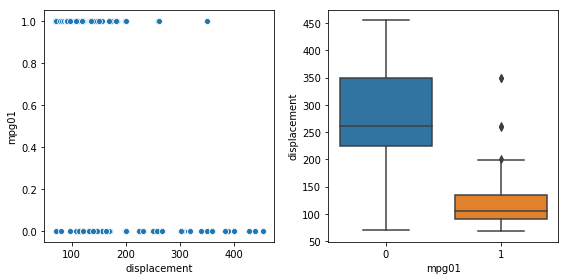

In [4]:
def explorePlots(var):
    fig, ax = plt.subplots(1, 2, figsize = (8, 4))
    sns.relplot(x = var, y = "mpg01", data = auto, ax = ax[0])
    sns.boxplot(x = "mpg01", y = var, data = auto, ax = ax[1])
    fig.tight_layout()
    plt.close(2)
explorePlots("displacement")

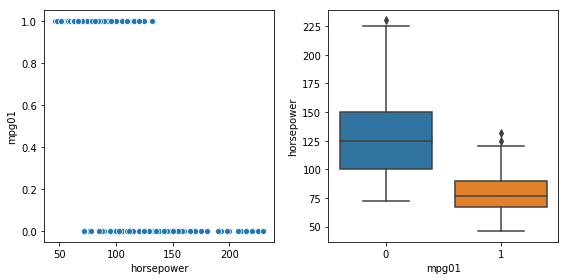

In [5]:
explorePlots("horsepower")

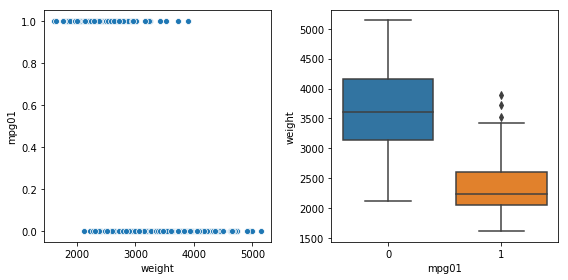

In [6]:
explorePlots("weight")

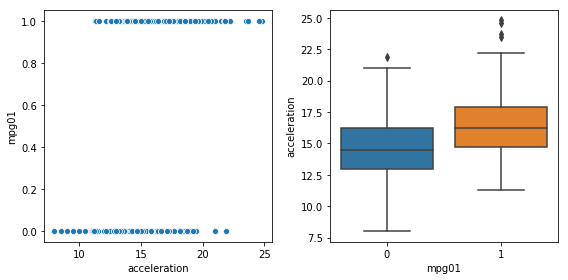

In [7]:
explorePlots("acceleration")

It appears that acceleration does not show a clear correlation with the binary mpg01 variable, as the boxplots appear similar.  However, the other 3 continuous variables (displacement, horsepower, and weight) all appear to differ significantly in their values for different values of mpg01.  These three will be our predictor variables for mpg01 for the 4 models:
1.  Linear Discriminant Analysis (LDA)
2.  Quadratic Discriminant Analysis (QDA)
3.  Logistic Regression
4.  K-Nearest Neighbors (KNN)

First, however, we need to split our data for training and testing.

In [8]:
from sklearn.model_selection import train_test_split
autoXTrain, autoXTest, autoYTrain, autoYTest = train_test_split(auto[['displacement', 'horsepower', 'weight']], 
                                                    auto['mpg01'], 
                                                    test_size=0.20, random_state=42)

## Linear Discriminant Analysis (LDA)

In [9]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as lda
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis as qda

def FitMod(mod, trainX, trainY, testX, testY):
    mod.fit(trainX, trainY)
    preds = mod.predict(testX)
    acc = sum(preds == testY) / len(preds)
    testError = 1-acc
    print("{:.3f}%".format(100*testError))

In [10]:
mod = lda()
FitMod(mod, autoXTrain, autoYTrain, autoXTest, autoYTest)

12.658%


## Quadratic Discriminant Analysis (QDA)

In [11]:
mod = qda()
FitMod(mod, autoXTrain, autoYTrain, autoXTest, autoYTest)

13.924%


## Logistic Regression

In [12]:
from sklearn.linear_model import LogisticRegression
mod = LogisticRegression(solver = "lbfgs")
FitMod(mod, autoXTrain, autoYTrain, autoXTest, autoYTest)

10.127%


## K-Nearest Neighbors (KNN)

7.595% at K = 3


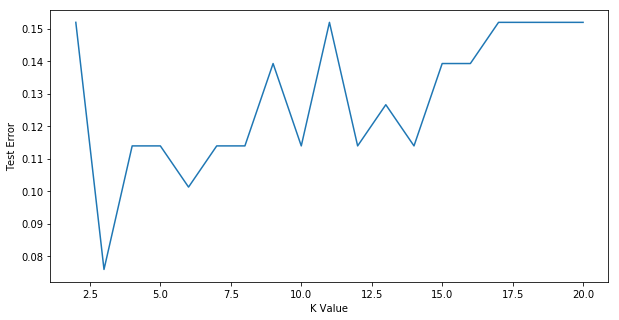

In [13]:
from sklearn.neighbors import KNeighborsClassifier as KNN

def FitKNN(mod, trainX, trainY, testX, testY):    
    mod.fit(trainX, trainY)
    preds = mod.predict(testX)
    acc = sum(preds == testY) / len(preds)
    testError = 1-acc
    return(testError)

testErrors = [0 for i in range(19)]
for k in range(2, 21):
    mod = KNN(n_neighbors = k)
    testErrors[k-2] = FitKNN(mod, autoXTrain, autoYTrain, autoXTest, autoYTest)

print("{:.3f}% at K = {:d}".format(100*min(testErrors), testErrors.index(min(testErrors))+2))
testData = pd.DataFrame([(range(2, 21)), (testErrors)]).T
testData.columns = ['K Value', 'Test Error']
fig, ax = plt.subplots(figsize = (10, 5))
sns.lineplot(x = 'K Value', y = 'Test Error', data = testData, ax = ax)
plt.close(2)